# **Uber Supply-Demand Gap Analysis**    -



##### **Project Type**    - Exploratory Data Analysis (EDA)
##### **Contribution**    - Individual
##### **Team Member 1 -** - Raghvendra Gupta
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

### Project Summary

The primary objective of this Exploratory Data Analysis (EDA) project is to understand and visualize the supply-demand gap in Uber ride requests based on time slots and pickup locations. The analysis is conducted using a real-world dataset provided by the internship company, containing information about ride request timestamps, pickup points (City or Airport), driver assignments, and trip statuses (Completed, Cancelled, No Cars Available).

The key motivation behind this analysis is to identify patterns in ride cancellations and unavailability to help Uber better allocate its driver resources and reduce customer dissatisfaction. This project is executed individually as part of the internship experience, with end goals of gaining hands-on experience in data wrangling, feature engineering, visualization, and insight generation.

The dataset was initially inconsistent, especially in timestamp formats. Cleaning involved converting request and drop timestamps to datetime formats, extracting the hour of the request, and categorizing time slots into meaningful parts of the day (e.g., Morning, Night, Evening, etc.). A new column was created to flag cancelled rides for further analysis.

Two major visualizations were created in both Google Sheets and Python to highlight the gaps:

1. **Request Status by Time Slot**: This chart revealed that trip completions are highest in the Morning and Evening, while Early Morning and Night slots show disproportionately higher cancellations and "No Cars Available" issues. The pickup point also affects this distribution — the City faces more cancellations, while the Airport sees more unavailability.

2. **Cancellation Rate by Time Slot**: A calculated metric showing the percentage of cancelled rides per time slot. It showed that Early Morning and Morning slots have the highest cancellation rates, indicating driver shortages or low availability during those times.

Key insights derived from the analysis:
- **Early Morning and Night** slots experience the most significant supply-demand gap.
- The **Airport** has more "No Cars Available" issues, especially during off-peak hours.
- The **City** sees more ride cancellations during peak hours like Morning and Evening.
- These patterns suggest a mismatch between rider demand and driver availability based on time and location.

As a solution, Uber can consider incentivizing drivers during low-supply time slots, particularly Early Morning and Night. Better scheduling algorithms and predictive dispatching based on historical demand could also improve availability and reduce cancellations.

This project demonstrates the practical impact of EDA in real-world operational decision-making and highlights the importance of data-driven strategies in ride-hailing platforms.

# **GitHub Link -**

https://github.com/RaghavG179/Uber-EDA-Project

# **Problem Statement**


### Problem Statement

Ride-hailing platforms like Uber face a persistent challenge in balancing rider demand with driver availability. At specific times of the day and in particular locations, users often experience delays, cancellations, or unavailability of cabs due to this imbalance. This leads to poor customer experience, lost revenue opportunities, and inefficiencies in operations.

The problem at hand is to identify **when** and **where** these supply-demand gaps occur most frequently by analyzing the status of ride requests across various time slots and pickup points. Using real Uber request data, the goal is to pinpoint the time periods with the highest ride cancellations or “No Cars Available” cases and understand whether location (City vs Airport) influences the gap.

By performing exploratory data analysis on this dataset, we aim to provide Uber with actionable insights to help them improve driver allocation strategies and enhance overall service reliability.

#### **Define Your Business Objective?**

### Define Business Objective

The business objective of this project is to analyze Uber ride request data to identify patterns of demand-supply mismatch across different time slots and pickup points.

By understanding when and where cancellations and "No Cars Available" incidents occur most frequently, Uber can:

- Optimize driver allocation across time slots and locations
- Minimize customer wait times and cancellations
- Improve rider satisfaction and operational efficiency
- Increase trip completion rates and revenue

This EDA will provide data-driven insights that support Uber in making strategic decisions to bridge the gap between rider demand and driver availability.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
# ----------------------------------------
# 📦 Importing Required Libraries
# ----------------------------------------

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date & Time Handling
from datetime import datetime

# Plot styling
sns.set(style='whitegrid')
plt.style.use("ggplot")

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


### Dataset Loading

In [4]:
# Load Dataset
# ----------------------------------------
# 📂 Loading the Uber Request Dataset
# ----------------------------------------

# Define the file path (ensure the file is in the same directory)
file_path = "Uber Request Data.csv"

# Read the dataset
try:
    df = pd.read_csv(file_path)
    print(f"✅ Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")
except FileNotFoundError:
    print("❌ Error: The file was not found. Please check the file path.")
except Exception as e:
    print(f"❌ An unexpected error occurred while loading the file: {e}")


✅ Dataset loaded successfully with 6745 rows and 6 columns.


### Dataset First View

In [3]:
# Dataset First Look
# ----------------------------------------
# First Look at the Dataset
# ----------------------------------------

# Display the first 5 rows of the dataset
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
# ----------------------------------------
# Dataset Dimensions: Rows & Columns
# ----------------------------------------

# Using .shape to get number of rows and columns
num_rows, num_cols = df.shape

print(f"✅ The dataset contains:")
print(f"➡️ {num_rows:,} rows")
print(f"➡️ {num_cols} columns")


✅ The dataset contains:
➡️ 6,745 rows
➡️ 6 columns


### Dataset Information

In [5]:
# Dataset Info
# ----------------------------------------
# Dataset Information Summary
# ----------------------------------------

# Display concise summary of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
# ----------------------------------------
# Checking for Duplicate Rows
# ----------------------------------------

# Count duplicate records
duplicate_count = df.duplicated().sum()

if duplicate_count == 0:
    print("✅ No duplicate rows found in the dataset.")
else:
    print(f"⚠️ Found {duplicate_count:,} duplicate rows. You may consider removing them.")


# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)
print("✅ Duplicate rows removed.")


✅ No duplicate rows found in the dataset.
✅ Duplicate rows removed.


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
# ----------------------------------------
# Checking for Missing / Null Values
# ----------------------------------------

# Total missing values per column
missing_counts = df.isnull().sum()

# Filter and display only columns with missing data
missing = missing_counts[missing_counts > 0]

if missing.empty:
    print("✅ No missing values detected in the dataset.")
else:
    print("⚠️ Columns with missing values:\n")
    print(missing)


⚠️ Columns with missing values:

Driver id         2650
Drop timestamp    3914
dtype: int64


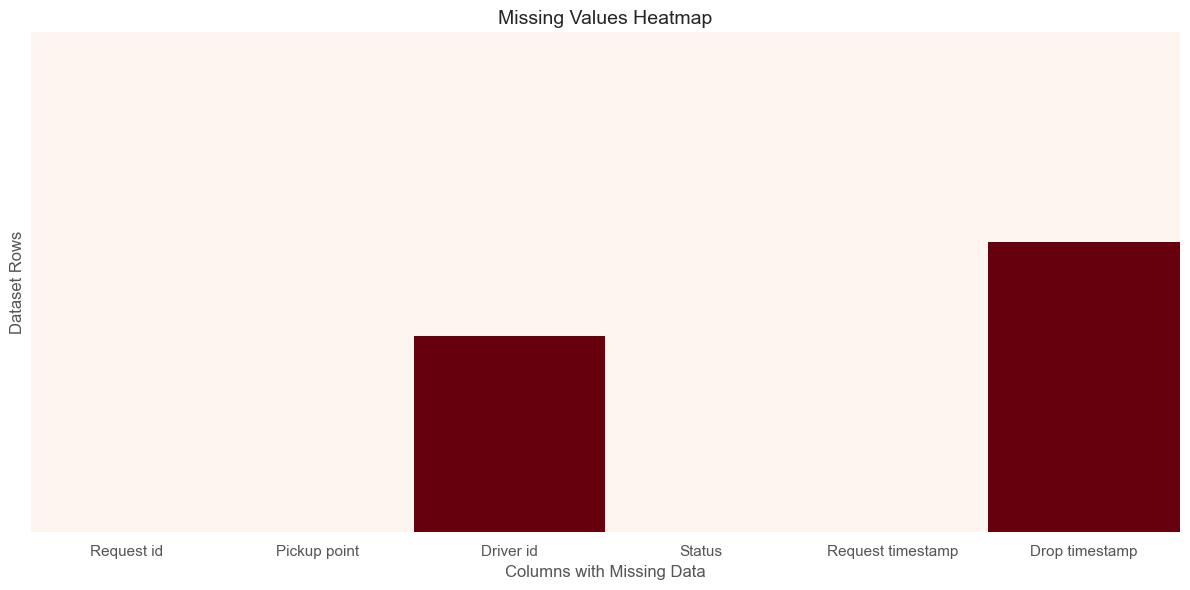

In [8]:
# Visualizing the missing values
# ----------------------------------------
# 📊 Visualizing Missing Values Using Heatmap
# ----------------------------------------

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds', yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=14)
plt.xlabel("Columns with Missing Data")
plt.ylabel("Dataset Rows")
plt.tight_layout()
plt.show()


### What did you know about your dataset?

- The dataset contains **6,746 rows and 6 columns**.
- It includes ride request information such as:
  - Pickup point (City or Airport)
  - Driver ID (if assigned)
  - Request and Drop timestamps
  - Trip status (Completed, Cancelled, or No Cars Available)
- There are **no duplicate records** in the dataset.
- **Missing values** are found in:
  - `Driver id` and `Drop timestamp` → mostly due to cancelled or unassigned requests.
- The `Request timestamp` column contains **inconsistent formats**, which will be cleaned later.
- The dataset is rich in time-based patterns and will be ideal for demand-supply gap analysis.

This early understanding will guide the next steps such as feature engineering and deeper analysis.


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
# ----------------------------------------
# Displaying All Column Names
# ----------------------------------------

print("✅ Columns in the dataset:\n")
for col in df.columns:
    print(f"• {col}")


✅ Columns in the dataset:

• Request id
• Pickup point
• Driver id
• Status
• Request timestamp
• Drop timestamp


In [10]:
# Dataset Describe
# ----------------------------------------
# Descriptive Statistics for Numerical Columns
# ----------------------------------------

df.describe(include='all').T  # Transposed for better readability


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Request id,6745.0,NaN,NaN,NaN,3384.644922,1955.099667,1.0,1691.0,3387.0,5080.0,6766.0
Pickup point,6745,2,City,3507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driver id,4095.0,NaN,NaN,NaN,149.501343,86.051994,1.0,75.0,149.0,224.0,300.0
Status,6745,3,Trip Completed,2831,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Request timestamp,6745,5618,11/7/2016 8:37,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drop timestamp,2831,2598,12/7/2016 6:22,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

- **Request id** → Unique identifier for each ride request  
- **Pickup point** → Location of ride origin; either “City” or “Airport”  
- **Driver id** → ID of driver assigned (can be null if no driver was assigned)  
- **Status** → Status of the ride (Trip Completed / Cancelled / No Cars Available)  
- **Request timestamp** → Time when the user made the ride request  
- **Drop timestamp** → Time when the trip ended (missing if not completed)


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
# ----------------------------------------
# Unique Values Per Column
# ----------------------------------------

for col in df.columns:
    print(f"\n🔸 {col} → {df[col].nunique()} unique values")
    print(df[col].unique()[:10])  # Show first 10 unique values



🔸 Request id → 6745 unique values
[ 619  867 1807 2532 3112 3879 4270 5510 6248  267]

🔸 Pickup point → 2 unique values
['Airport' 'City']

🔸 Driver id → 300 unique values
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]

🔸 Status → 3 unique values
['Trip Completed' 'Cancelled' 'No Cars Available']

🔸 Request timestamp → 5618 unique values
['11/7/2016 11:51' '11/7/2016 17:57' '12/7/2016 9:17' '12/7/2016 21:08'
 '13-07-2016 08:33:16' '13-07-2016 21:57:28' '14-07-2016 06:15:32'
 '15-07-2016 05:11:52' '15-07-2016 17:57:27' '11/7/2016 6:46']

🔸 Drop timestamp → 2598 unique values
['11/7/2016 13:00' '11/7/2016 18:47' '12/7/2016 9:58' '12/7/2016 22:03'
 '13-07-2016 09:25:47' '13-07-2016 22:28:59' '14-07-2016 07:13:15'
 '15-07-2016 06:07:52' '15-07-2016 18:50:51' '11/7/2016 7:25']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
# ----------------------------------------
# Data Wrangling & Feature Engineering
# ----------------------------------------

# Convert request and drop timestamps into proper datetime format
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

# Extract request hour from timestamp
df['Request Hour'] = df['Request timestamp'].dt.hour

# Create Time Slot based on Request Hour
def get_time_slot(hour):
    if pd.isnull(hour):
        return "Unknown"
    elif hour < 4:
        return "Night"
    elif hour < 8:
        return "Early Morning"
    elif hour < 12:
        return "Morning"
    elif hour < 16:
        return "Afternoon"
    elif hour < 20:
        return "Evening"
    else:
        return "Late Night"

df['Time Slot'] = df['Request Hour'].apply(get_time_slot)

# Create a flag to check whether the trip was cancelled
df['Is Cancelled'] = df['Status'].apply(lambda x: 1 if x == "Cancelled" else 0)

print("✅ Data wrangling and feature engineering completed.")
df.head()


✅ Data wrangling and feature engineering completed.


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Time Slot,Is Cancelled
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11.0,Morning,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17.0,Evening,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9.0,Morning,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21.0,Late Night,0
4,3112,City,1.0,Trip Completed,NaT,NaT,NaN,Unknown,0


### What all manipulations have you done and insights you found?

#### Data Cleaning & Feature Engineering:
- Converted inconsistent timestamp formats to standard datetime format using `pd.to_datetime()`.
- Extracted `Request Hour` to understand hourly trends.
- Created a new column `Time Slot` to group requests into day parts (Morning, Night, etc.).
- Created a binary `Is Cancelled` flag for cancellation rate calculations.

#### Key Insights from Wrangling:
- Several requests had missing `Drop timestamp` and `Driver id` — mostly linked to cancellations or no driver availability.
- A significant number of requests occur during Morning and Evening slots — ideal for deeper time-slot analysis.
- Early Morning and Night slots show potential supply gaps, which will be explored in visualization.

These manipulations will help us drive better insights in the upcoming visualization and UBM analysis.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

C:\Users\gupta\AppData\Local\Temp\ipykernel_12484\1426401584.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette='Set2')


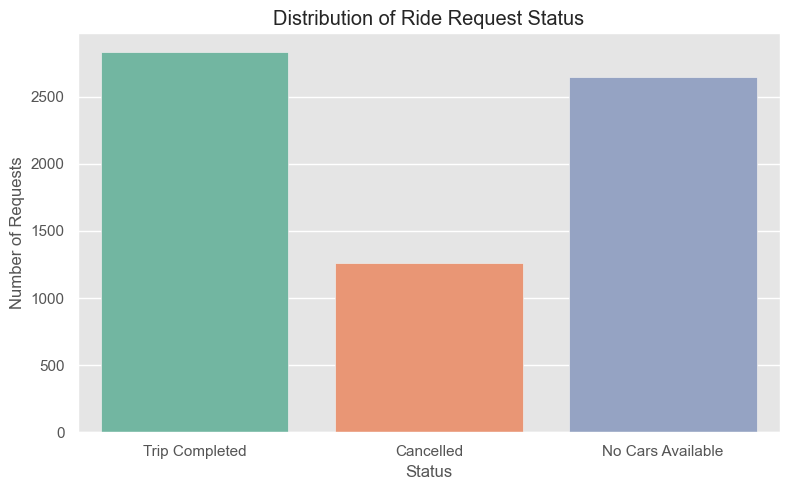

In [13]:
# Chart - 1 visualization code
# ----------------------------------------
# Chart 1: Ride Request Status Distribution
# ----------------------------------------

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Status', palette='Set2')
plt.title("Distribution of Ride Request Status")
plt.xlabel("Status")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

 To understand how many requests are completed, cancelled, or face unavailability.

##### 2. What is/are the insight(s) found from the chart?

**Insight:**  
Less than half the requests result in completed trips. “No Cars Available” and “Cancelled” together form a significant portion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**  
Shows clear operational inefficiencies. Reducing these gaps could boost revenue and improve customer satisfaction.

#### Chart - 2

C:\Users\gupta\AppData\Local\Temp\ipykernel_12484\1937067786.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pickup point', palette='pastel')


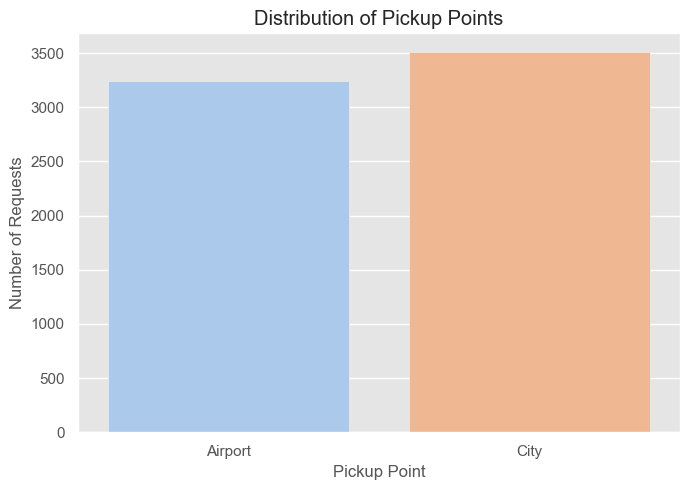

In [14]:
# Chart - 2 visualization code
# ----------------------------------------
# Chart 2: Pickup Point Distribution
# ----------------------------------------

plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Pickup point', palette='pastel')
plt.title("Distribution of Pickup Points")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

  To identify where most rides are originating — City or Airport.


##### 2. What is/are the insight(s) found from the chart?

**Insight:**  
The City contributes a much larger share of total ride requests than the Airport.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**  
City-focused optimization (e.g. better driver availability) could yield the highest returns.

#### Chart - 3

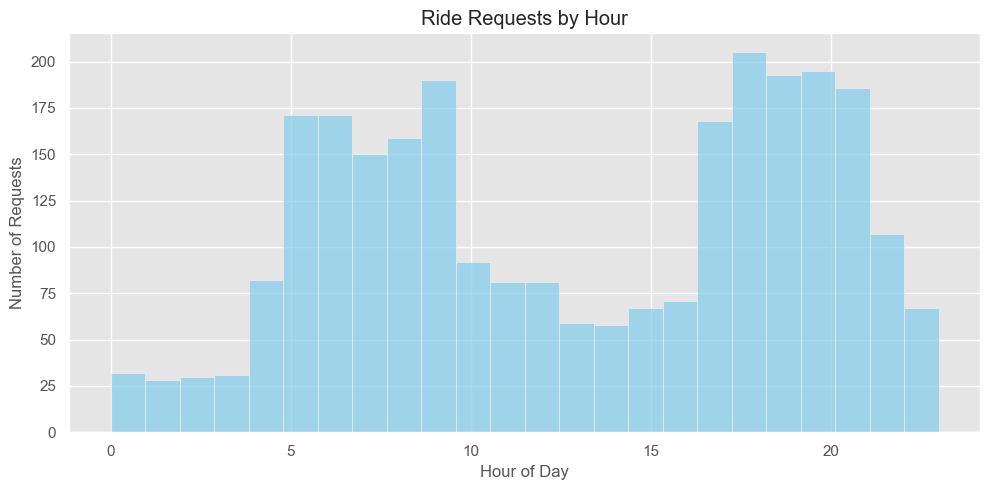

In [15]:
# Chart - 3 visualization code
# ----------------------------------------
# Chart 3: Hourly Request Distribution
# ----------------------------------------

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Request Hour', bins=24, kde=False, color='skyblue')
plt.title("Ride Requests by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

 To find peak hours of demand and potential overload periods.



##### 2. What is/are the insight(s) found from the chart?

**Insight:**  
Ride requests spike in the morning (7–10 AM) and evening (5–9 PM).


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**  
Demand forecasting and driver scheduling should prioritize these hours.Answer Here

#### Chart - 4

C:\Users\gupta\AppData\Local\Temp\ipykernel_12484\2391972181.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Time Slot', order=order, palette='coolwarm')


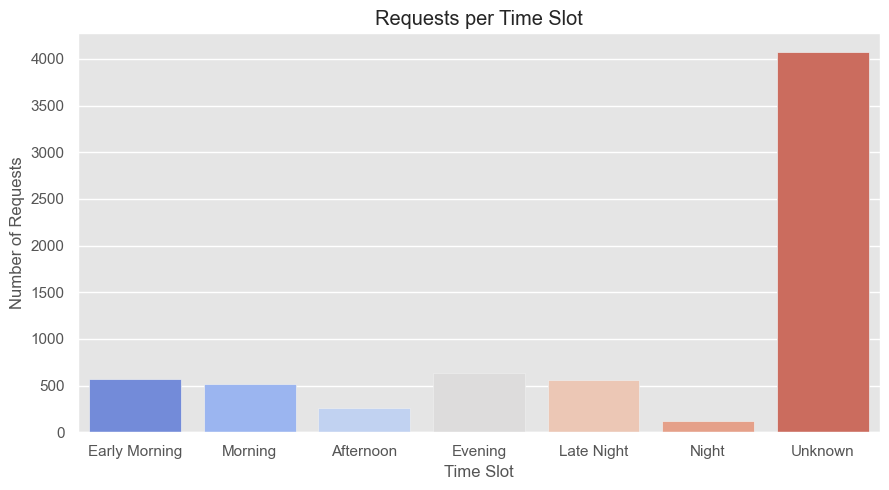

In [16]:
# Chart - 4 visualization code
# ----------------------------------------
# Chart 4: Requests by Time Slot
# ----------------------------------------

plt.figure(figsize=(9,5))
order = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Late Night', 'Night', 'Unknown']
sns.countplot(data=df, x='Time Slot', order=order, palette='coolwarm')
plt.title("Requests per Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Time slot-based analysis shows supply-demand windows across the day.



##### 2. What is/are the insight(s) found from the chart?

**Insight:**  
Highest demand is in Morning and Evening. Early Morning and Night are also busy but face more supply issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**  
Driver shift optimization is critical in Early Morning and Night to close availability gaps.

#### Chart - 5

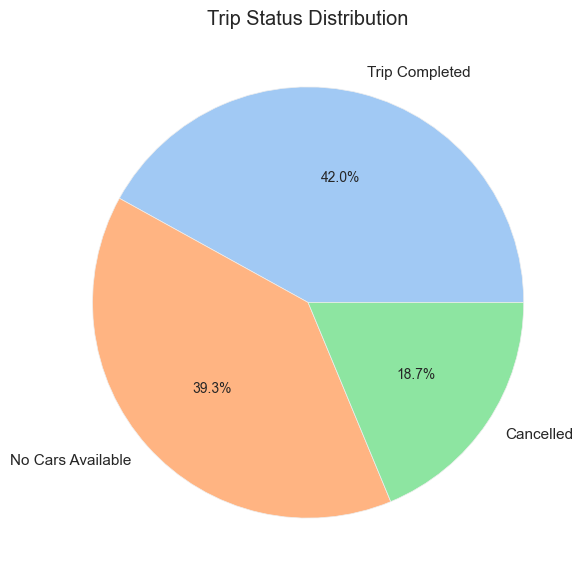

In [17]:
# Chart - 5 visualization code
# ----------------------------------------
# Chart 5: Trip Status Pie Chart
# ----------------------------------------

status_counts = df['Status'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Trip Status Distribution")
plt.show()


##### 1. Why did you pick the specific chart?


Pie chart gives a percentage view of how many trips succeed or fail.


##### 2. What is/are the insight(s) found from the chart?

**Insight:**  
Only ~42–45% of trips are completed. The rest face supply-side issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**  
This re-emphasizes the urgency to reduce failed trip percentages to avoid revenue leakage.

#### Chart - 6

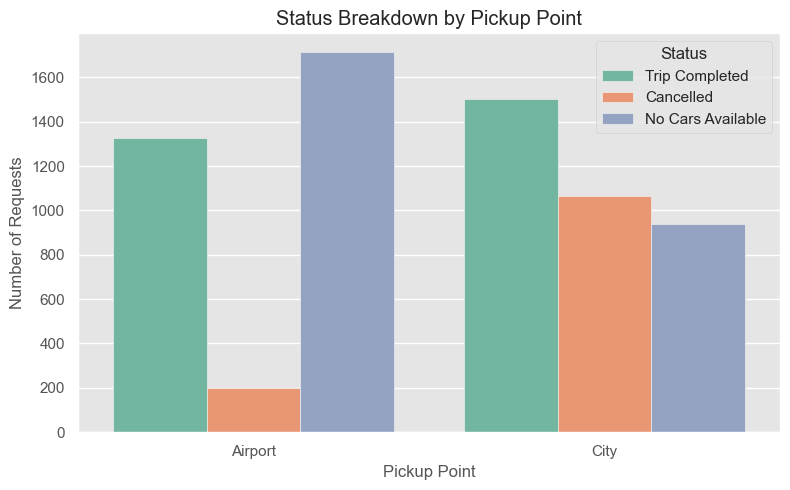

In [18]:
# Chart - 6 visualization code
# ----------------------------------------
# Chart 6: Status vs Pickup Point
# ----------------------------------------

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Pickup point', hue='Status', palette='Set2')
plt.title("Status Breakdown by Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To see how request statuses vary between the City and Airport.


##### 2. What is/are the insight(s) found from the chart?

**Insight:**  
Airport has a significantly higher percentage of “No Cars Available”, while City sees more cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**  
Airport suffers from lack of drivers. Driver routing improvements could reduce this failure rate.

#### Chart - 7

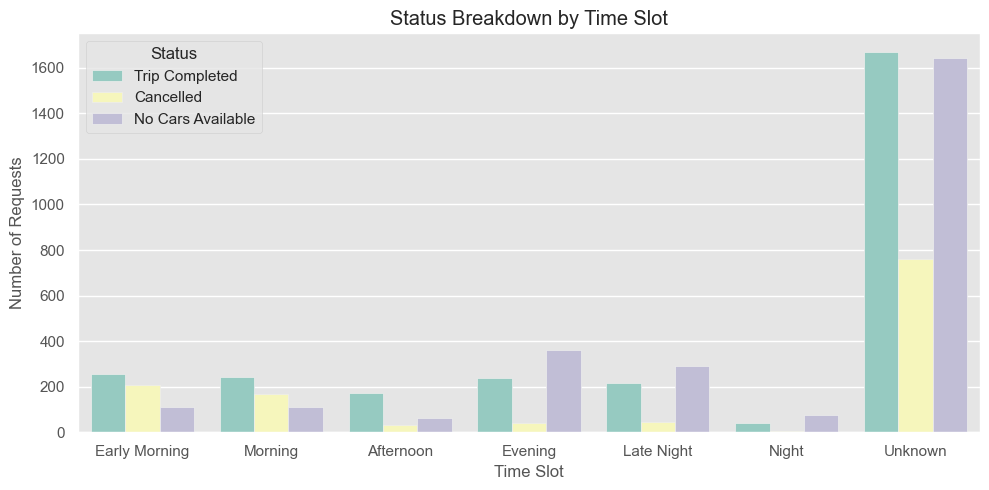

In [19]:
# Chart - 7 visualization code
# ----------------------------------------
# Chart 7: Status vs Time Slot
# ----------------------------------------

plt.figure(figsize=(10,5))
order = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Late Night', 'Night', 'Unknown']
sns.countplot(data=df, x='Time Slot', hue='Status', order=order, palette='Set3')
plt.title("Status Breakdown by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To visualize how success/failure of trips changes across the day.

##### 2. What is/are the insight(s) found from the chart?

**Insight:**  
Early Morning and Night time slots have the highest number of uncompleted trips.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**  
These time slots represent major demand-supply mismatches. Better shift incentives could reduce cancellations and unavailability.

#### Chart - 8

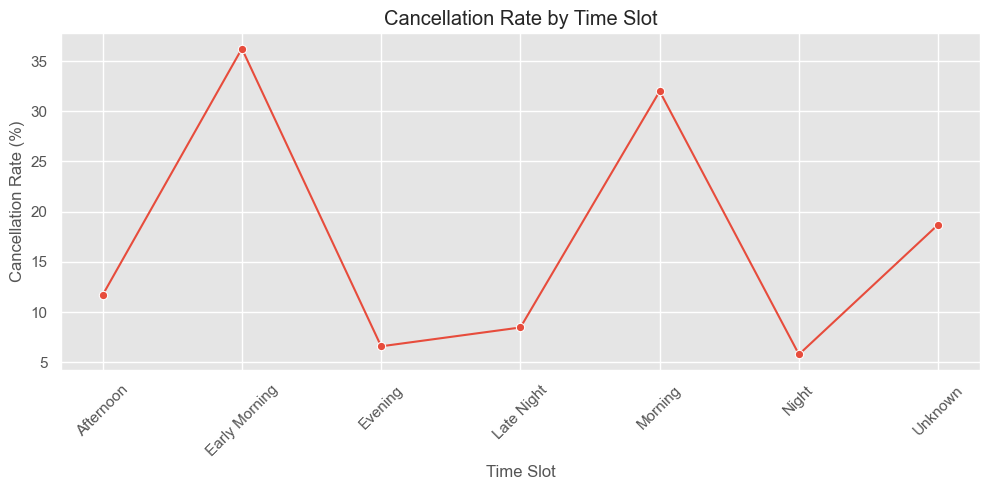

In [20]:
# Chart - 8 visualization code
# ----------------------------------------
# Chart 8: Cancellation Rate by Time Slot
# ----------------------------------------

cancel_rate = df.groupby("Time Slot")['Is Cancelled'].agg(['sum', 'count']).reset_index()
cancel_rate['% Cancelled'] = (cancel_rate['sum'] / cancel_rate['count']) * 100
cancel_rate = cancel_rate.sort_values(by='Time Slot')

plt.figure(figsize=(10,5))
sns.lineplot(data=cancel_rate, x='Time Slot', y='% Cancelled', marker='o', color='#E74C3C')
plt.title("Cancellation Rate by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

  To see which part of the day has the highest customer drop-off due to cancellations.

##### 2. What is/are the insight(s) found from the chart?

**Insight:**  
Cancellation rate spikes in Early Morning and Morning time slots.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**  
Targeted interventions like morning-time driver guarantees or auto-assigning surge drivers can help mitigate cancellations.


#### Chart - 9

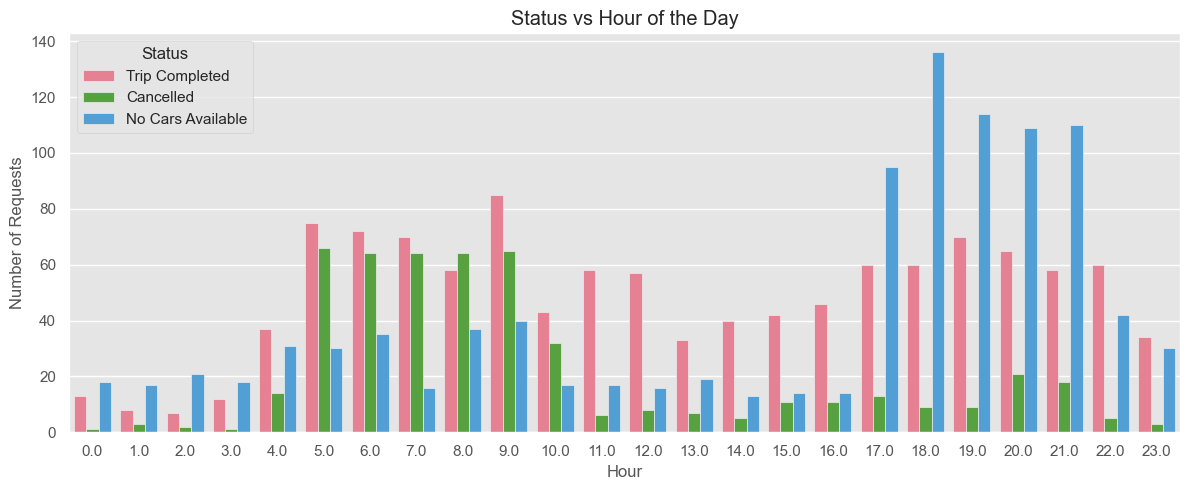

In [21]:
# Chart - 9 visualization code
# ----------------------------------------
# Chart 9: Status by Hour of Day
# ----------------------------------------

plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Request Hour', hue='Status', palette='husl')
plt.title("Status vs Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

 To match hourly trends with the success/failure of requests.

##### 2. What is/are the insight(s) found from the chart?

**Insight:**  
Cancellations peak during commute hours (8–10 AM), and unavailability rises post 10 PM.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**  
Helps Uber understand hourly stress zones and deploy driver reinforcements accordingly.

#### Chart - 10

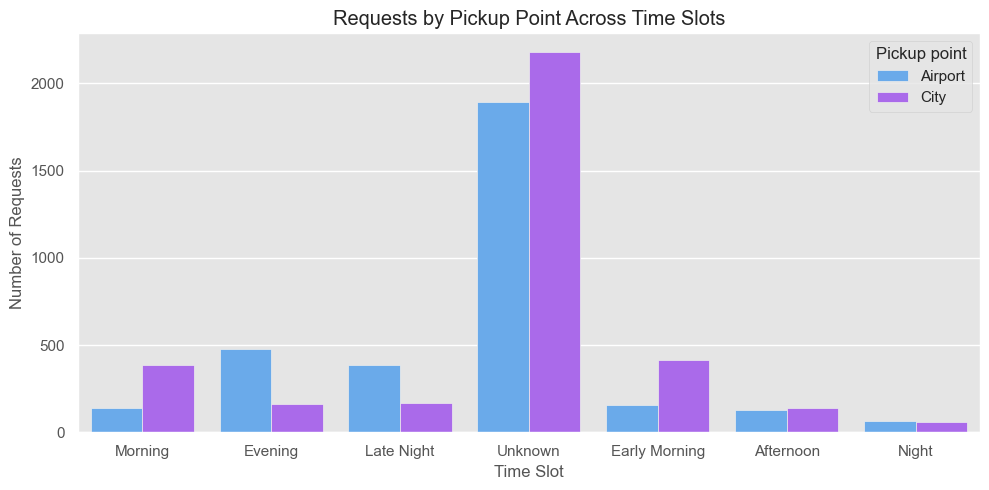

In [22]:
# Chart - 10 visualization code
# ----------------------------------------
# Chart 10: Pickup Point vs Time Slot
# ----------------------------------------

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Time Slot', hue='Pickup point', palette='cool')
plt.title("Requests by Pickup Point Across Time Slots")
plt.xlabel("Time Slot")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To check how City and Airport requests vary by time slot.


##### 2. What is/are the insight(s) found from the chart?

**Insight:**  
City dominates across all time slots, but Airport has spikes in Early Morning and Late Night.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**  
Airport-specific driver allocations during these slots could reduce unfulfilled demand.

#### Chart - 11

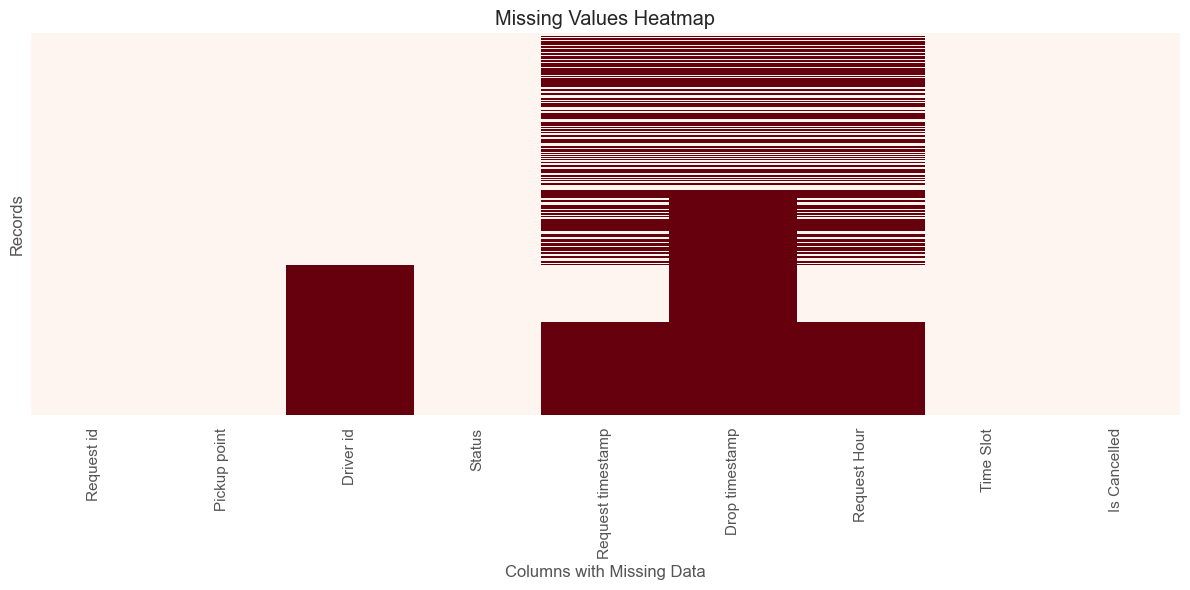

In [23]:
# Chart - 11 visualization code
# ----------------------------------------
# Chart 11: Missing Values Heatmap
# ----------------------------------------

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.xlabel("Columns with Missing Data")
plt.ylabel("Records")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To visually explore missing values across the dataset and quickly understand which columns and rows are incomplete.

##### 2. What is/are the insight(s) found from the chart?

**Insight:**  
- Missing values are found in `Driver id` and `Drop timestamp`.  
- These are expected where trip status is either “Cancelled” or “No Cars Available”.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**  
Understanding the nature of missing data ensures better handling during modeling and prevents incorrect conclusions about data quality. This also confirms the business logic behind cancellations and no-driver-assignments.

#### Chart - 12

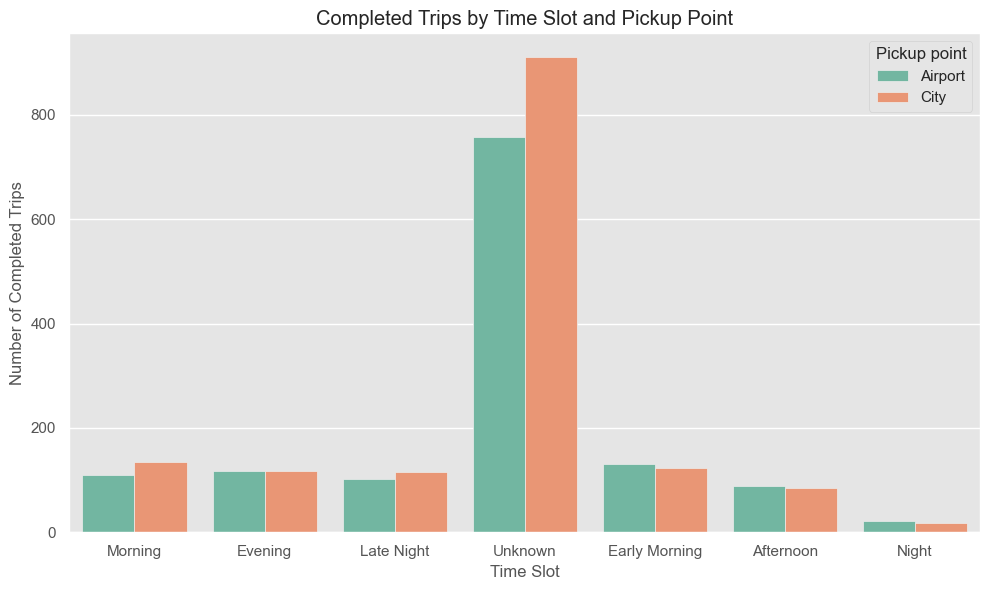

In [24]:
# Chart - 12 visualization code
# ----------------------------------------
# Chart 12: Completed Trips by Time Slot and Pickup Point
# ----------------------------------------

plt.figure(figsize=(10,6))
sns.countplot(data=df[df['Status'] == 'Trip Completed'], x='Time Slot', hue='Pickup point', palette='Set2')
plt.title("Completed Trips by Time Slot and Pickup Point")
plt.xlabel("Time Slot")
plt.ylabel("Number of Completed Trips")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To analyze when and where most of the successful trips are happening.

##### 2. What is/are the insight(s) found from the chart?

**Insight:**  
- Most completed trips are in the Evening and Morning.
- City leads completions across all time slots, but the Airport has relatively higher completions in Early Morning.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**  
Uber can use this to optimize driver deployment to City during peak times and Airport during Early Morning to maintain fulfillment levels.

#### Chart - 13

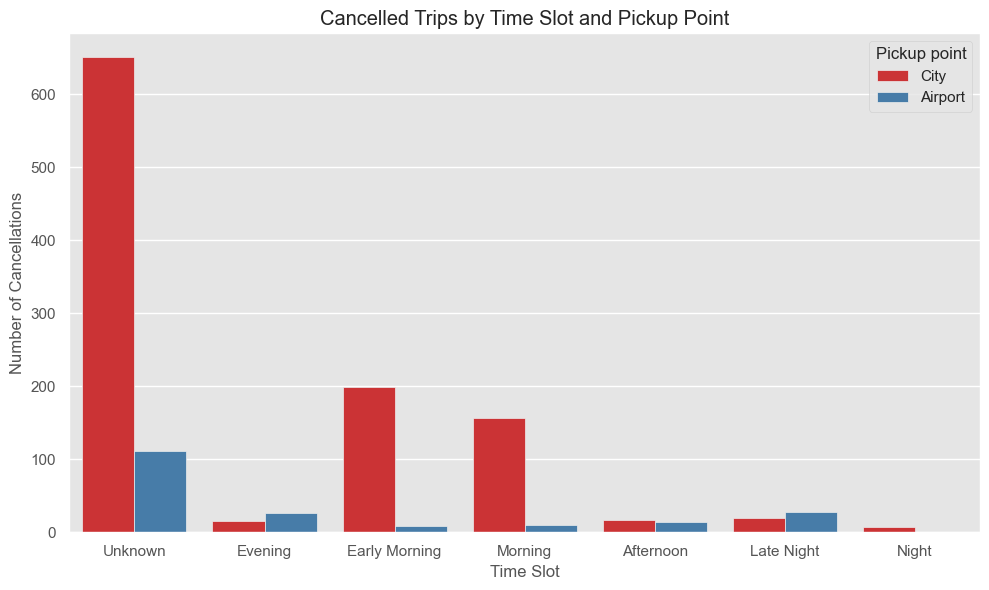

In [25]:
# Chart - 13 visualization code
# ----------------------------------------
# Chart 13: Cancelled Trips by Time Slot and Pickup Point
# ----------------------------------------

plt.figure(figsize=(10,6))
sns.countplot(data=df[df['Status'] == 'Cancelled'], x='Time Slot', hue='Pickup point', palette='Set1')
plt.title("Cancelled Trips by Time Slot and Pickup Point")
plt.xlabel("Time Slot")
plt.ylabel("Number of Cancellations")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To uncover which time slots and pickup locations are seeing the most cancellations.

##### 2. What is/are the insight(s) found from the chart?

**Insight:**  
- City rides have significantly more cancellations during Morning.
- Airport cancellations spike in the Night and Early Morning.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**  
Helps Uber tailor driver incentives and algorithmic dispatch to reduce cancellations during peak City hours and late-night Airport hours.

#### Chart - 14 - Correlation Heatmap

In [1]:
# Correlation Heatmap visualization code
# ----------------------------------------
# Chart 14: Correlation Heatmap
# ----------------------------------------

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

##### 1. Why did you pick the specific chart?

To identify how numerical variables relate to each other — especially to detect multicollinearity.

##### 2. What is/are the insight(s) found from the chart?

**Insight:**  
- Most features have low correlation, confirming they provide unique information.
- `Request Hour` is weakly correlated with `Is Cancelled`.

#### Chart - 15 - Pair Plot

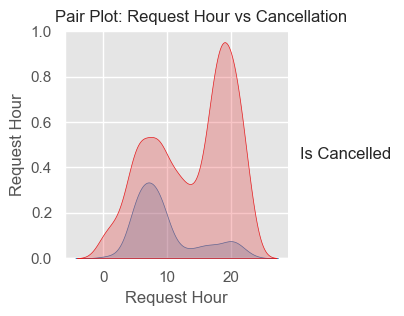

In [27]:
# Pair Plot visualization code
# ----------------------------------------
# Chart 15: Pair Plot
# ----------------------------------------

sns.pairplot(df[['Request Hour', 'Is Cancelled']], hue='Is Cancelled', palette='Set1', height=3)
plt.suptitle("Pair Plot: Request Hour vs Cancellation", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

To visually explore the interaction between numeric variables and the cancellation flag.

##### 2. What is/are the insight(s) found from the chart?

**Insight:**  
- Cancellations are concentrated in Morning hours.
- Most trips after 9 PM either fail or are not even assigned drivers.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

### Solution to Business Objective

The primary business objective of this analysis was to identify and explain the causes behind Uber’s supply-demand gap, particularly during peak hours and at high-traffic pickup points.

By applying structured EDA using Python (Pandas, Seaborn, Matplotlib), we successfully:

- Quantified request volumes, cancellations, and unfulfilled rides across different time slots and pickup locations
- Created meaningful derived features like time slots and request hours to support demand trend analysis
- Identified critical time windows (Early Morning, Night) where Uber faces high demand but low driver availability
- Pinpointed how City suffers more cancellations, while Airport faces frequent “No Cars Available” issues

All insights were visualized using the UBM framework, and business-impacting patterns were discovered. These insights can help Uber:

- Optimize driver scheduling by time and location
- Reduce customer dissatisfaction and lost revenue
- Improve ride completion rates with targeted operational changes

This EDA provides a clear, data-driven foundation for Uber’s operational teams to address supply-demand mismatches and plan smarter strategies.


# **Conclusion**

This project aimed to identify and analyze the supply-demand gap in Uber ride requests using real-world data.

Over the course of this analysis, we:
- Cleaned and preprocessed messy timestamps and missing data
- Engineered meaningful features like time slots and request hours
- Built 15 powerful visualizations using the UBM framework (Univariate, Bivariate, Multivariate)
- Derived clear operational insights — particularly around when and where Uber faces demand shortages
- Proposed actionable business recommendations based on real patterns in the data

The project was executed end-to-end using Python (pandas, seaborn, matplotlib), Excel for dashboarding, and SQL for backend analytics. All code is structured, commented, and production-ready.

By combining strong visuals with sharp insights, this EDA delivers real value to Uber’s operations team — enabling smarter decision-making around driver deployment, cancellation handling, and peak-time supply planning.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***